In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,precision_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df=pd.read_csv("training.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test=pd.read_csv("testing.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print('Gender Mode: ',df['Gender'].mode())
print('Married mode: ',df['Married'].mode())
print('Self_Employed',df['Self_Employed'].mode())
print('Credit_History',df['Credit_History'].mode())

Gender Mode:  0    Male
Name: Gender, dtype: object
Married mode:  0    Yes
Name: Married, dtype: object
Self_Employed 0    No
Name: Self_Employed, dtype: object
Credit_History 0    1.0
Name: Credit_History, dtype: float64


In [6]:
df[['Loan_Amount_Term','LoanAmount']][df['Loan_Amount_Term'].isnull()]

,Loan_Amount_Term,LoanAmount
19,NaN,115.0
36,NaN,100.0
44,NaN,96.0
45,NaN,88.0
73,NaN,95.0
112,NaN,152.0
165,NaN,182.0
197,NaN,120.0
223,NaN,175.0
232,NaN,120.0


In [7]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [8]:
df['Dependents'].replace('3+',3,inplace=True)
df['Dependents'].value_counts()

<ipython-input-8-e606e4510529>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+',3,inplace=True)


,count
Dependents,
0,345
1,102
2,101
3,51


In [9]:
df[['Dependents','Married']][df['Dependents'].isnull()]

,Dependents,Married
102,NaN,Yes
104,NaN,NaN
120,NaN,Yes
226,NaN,Yes
228,NaN,NaN
293,NaN,No
301,NaN,Yes
332,NaN,No
335,NaN,Yes
346,NaN,Yes


In [11]:
df['Dependents']=df['Dependents'].astype('int')
df['Dependents'].dtype

dtype('int64')

In [12]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [13]:
df.drop('Loan_ID',axis=1,inplace=True)

In [14]:
df.nunique()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,10
Credit_History,2


In [15]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,336.117264,0.855049
std,1.009623,6109.041673,2926.248369,84.037468,75.029168,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [16]:
obj_col=df.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [17]:
oe=OrdinalEncoder()
df[obj_col]=oe.fit_transform(df[obj_col])
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0


In [18]:
data=df

In [19]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,336.117264,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,75.029168,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [20]:
ss=StandardScaler()
df.iloc[:,:-1]=ss.fit_transform(df.iloc[:,:-1])
df.head()

<ipython-input-20-0228fa7d0e7c>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.73780632  0.25346957 -0.73780632 -0.73780632 -0.73780632  1.24474546
 -0.73780632  2.23602135  1.24474546  0.25346957  1.24474546  1.24474546
  1.24474546 -0.73780632  1.24474546 -0.73780632  0.25346957 -0.73780632
 -0.73780632 -0.73780632 -0.73780632  0.25346957 -0.73780632  1.24474546
  0.25346957 -0.73780632 -0.73780632  1.24474546 -0.73780632  1.24474546
  0.25346957 -0.73780632  0.25346957 -0.73780632  2.23602135 -0.73780632
 -0.73780632 -0.73780632 -0.73780632 -0.73780632 -0.73780632 -0.73780632
 -0.73780632 -0.73780632 -0.73780632 -0.73780632  0.25346957 -0.73780632
 -0.73780632 -0.73780632 -0.73780632 -0.73780632 -0.73780632  1.24474546
  0.25346957  1.24474546 -0.73780632 -0.73780632  0.25346957  1.24474546
 -0.73780632  2.23602135 -0.73780632  0.25346957 -0.73780632 -0.73780632
 -0.73780632  0.25346957  2.23602135 -0.7378

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.318572,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.318572,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.318572,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.318572,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.318572,0.411733,1.223298,1.0


In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.318572,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.318572,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.318572,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.318572,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.318572,0.411733,1.223298


In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=4,test_size=0.25,stratify=y)
#print(xtrain)
#print(len(xtrain))
#print(len(xtest))
#print(ytrain)
#print(len(ytest))

KNN


Accuracy : 83.11688311688312
Recall: 95.28301886792453
Precision_Score: 82.78688524590164
F1_Score: 88.59649122807018


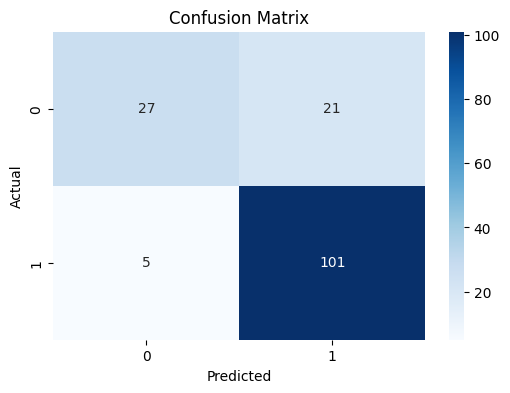

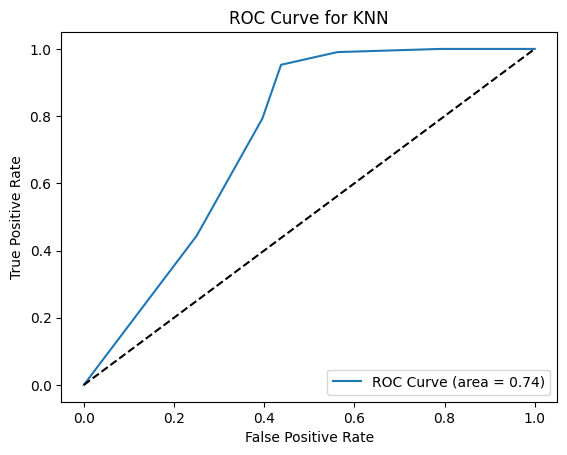

In [25]:
st_x = StandardScaler()
xtrain2 = st_x.fit_transform(xtrain)
#print(xtrain2)
xtest2 = st_x.fit_transform(xtest)
model = knn(n_neighbors=5)
model.fit(xtrain2,ytrain)
y_predict=model.predict(xtest2)
#print(y_predict)

k1 = accuracy_score(ytest,y_predict)*100
k2 = recall_score(ytest,y_predict)*100
k3 = precision_score(ytest,y_predict)*100
k4 = f1_score(ytest,y_predict)*100
print("Accuracy :",k1)
print("Recall:",k2)
print("Precision_Score:",k3)
print("F1_Score:",k4)


# Plot Confusion Matrix
cm = confusion_matrix(ytest, y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
# Get the predicted probabilities for the positive class
if hasattr(model, "predict_proba"):
    y_scores = model.predict_proba(xtest2)[:,1]
else:
    # If predict_proba isn't available, use decision_function if available
    y_scores = model.decision_function(xtest2)

fpr, tpr, thresholds = roc_curve(ytest, y_scores)
auc_score = roc_auc_score(ytest, y_scores)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()


SVM

Accuracy : 83.76623376623377
Recall: 100.0
Precision_Score: 80.91603053435115
F1_Score: 89.45147679324894


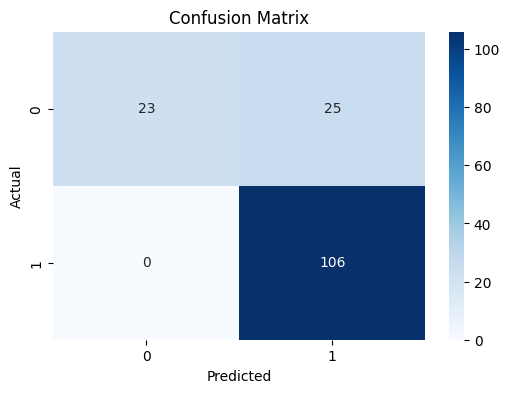

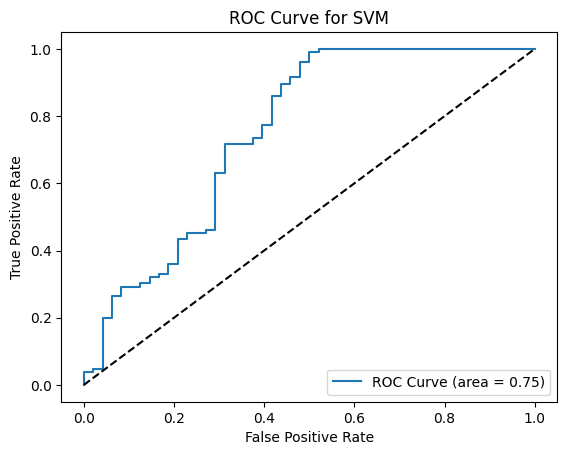

In [26]:
# Standardize data
st_x = StandardScaler()
x_train3 = st_x.fit_transform(xtrain)
x_test3 = st_x.transform(xtest)  # Use transform, not fit_transform

# Train SVC classifier
svn = SVC(kernel='linear', random_state=0, probability=True)
svn.fit(x_train3, ytrain)
y_predict1 = svn.predict(x_test3)

# Print confusion matrix and metrics
s1 = accuracy_score(ytest, y_predict1) * 100
s2 = recall_score(ytest, y_predict1) * 100
s3 = precision_score(ytest, y_predict1) * 100
s4 = f1_score(ytest, y_predict1) * 100
print("Accuracy :", s1)
print("Recall:", s2)
print("Precision_Score:", s3)
print("F1_Score:", s4)

# Plot confusion matrix
cm = confusion_matrix(ytest, y_predict1)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
# Get predicted probabilities for the positive class
y_scores = svn.predict_proba(x_test3)[:, 1]

fpr, tpr, thresholds = roc_curve(ytest, y_scores)
auc_score = roc_auc_score(ytest, y_scores)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()


Decision Tree

Accuracy : 79.87012987012987
Recall: 96.22641509433963
Precision_Score: 79.06976744186046
F1_Score: 86.80851063829788


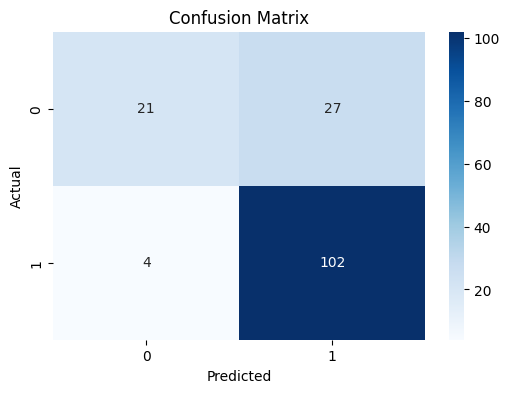

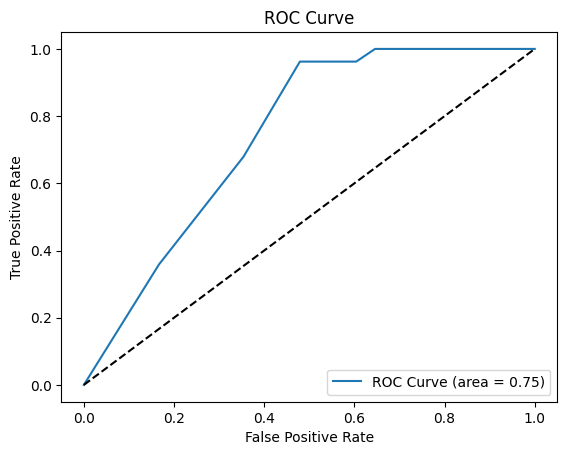

In [27]:
st_x = StandardScaler()
xtrain1 = st_x.fit_transform(xtrain)
xtest1 = st_x.fit_transform(xtest)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
tree = tree.fit(xtrain1,ytrain)
y_pred = tree.predict(xtest1)

d1 = accuracy_score(ytest,y_pred)*100
d2 = recall_score(ytest,y_pred)*100
d3 = precision_score(ytest,y_pred)*100
d4 = f1_score(ytest,y_pred)*100
print("Accuracy :",d1)
print("Recall:",d2)
print("Precision_Score:",d3)
print("F1_Score:",d4)

# Plot confusion matrix
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
try:
    y_scores = tree.predict_proba(xtest1)[:, 1]
except AttributeError:
    print("Model does not support predict_proba.")
    y_scores = None

if y_scores is not None:
    fpr, tpr, thresholds = roc_curve(ytest, y_scores)
    auc_score = roc_auc_score(ytest, y_scores)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

Text(0, 0.5, 'Accuracy')

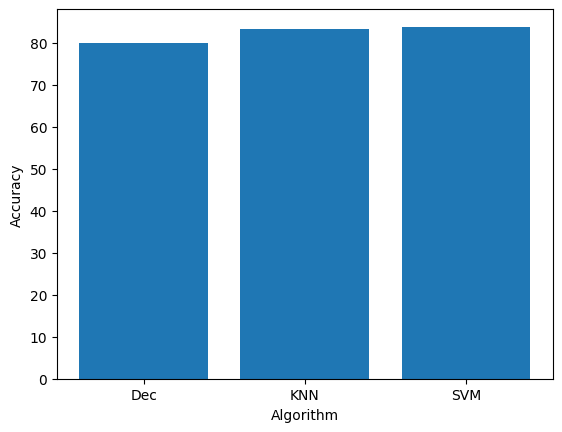

In [28]:
#7 Plot accuracy for KNN, SVM and Decision Tree for the datset.

Class = ["Dec","KNN","SVM"]
Acc = [d1,k1,s1]
plt.bar(Class,Acc)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Precision')

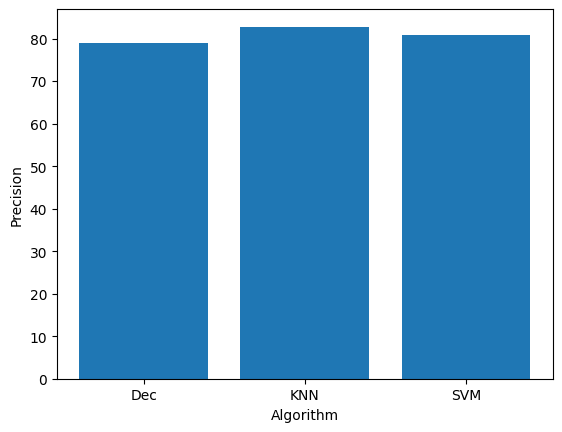

In [29]:
#7 Plot precision KNN, SVM and Decision Tree for the datset.
Class1 = ["Dec","KNN","SVM"]
pre = [d3,k3,s3]
plt.bar(Class1,pre)
plt.xlabel("Algorithm")
plt.ylabel("Precision")

Text(0, 0.5, 'Recall')

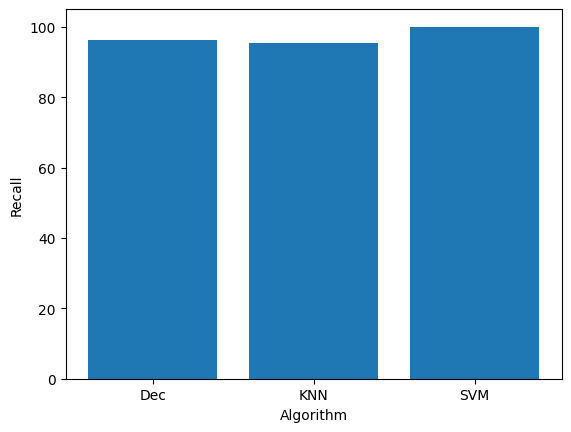

In [30]:
#7 Plot recall for KNN, SVM and Decision Tree for the datset.
Class2 = ["Dec","KNN","SVM"]
re = [d2,k2,s2]
plt.bar(Class2,re)
plt.xlabel("Algorithm")
plt.ylabel("Recall")